In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
import time
warnings.filterwarnings('ignore')

C:\Users\foulo\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>CSS Stylesheet</h1>

<style>
    /* Define CSS styles here */
    h1 {
        color: blue;
    }
    p {
        font-size: 16px;
        font-weight: bold;
    }
    .custom-class {
        background-color: yellow;
        border: 1px solid black;
        padding: 10px;
    }
</style>

In [2]:
css_style = """
h1 {
    color: black;
    font-family: 'Segoe UI', 'Gill Sans MT', Calibri, 'Trebuchet MS', sans-serif;
    font-size: 35px !important;
    padding-bottom: 10px;
    padding-top: 10px;
    border-bottom: 5px solid navy;
    border-top: 5px solid navy;
    font-variant: small-caps;
    text-align: center;
    margin-bottom: 25px;
}

h3 {
    color : dimgray;    
}

.all {
/*This class is the default class for <div> so it does not interact with jupyter notebook structure */
text-align: justify;
font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
margin-right: 2px;
}

.titlediv {
    /*This class is the default class for <div> so it does not interact with jupyter notebook structure */
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 5px solid navy;
    padding-top: 30px;
    padding-bottom: 30px;
    padding-left: 5px;
    padding-right: 5px;
    margin-bottom: 10px;
    }

.titlediv_2 {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    text-align: center !important;
    }

.titlep {
    font-size : 50px;
    text-align: center !important;
    font-variant: small-caps;
}   

.titlep_2 {
    font-size : 30px;
    text-align: center !important;
    margin-top: 10px;
}  

.title_sp {
    text-align: center !important;
    font-size: 20px !important;
    font-weight: bold;
}

.signature {
    margin-top: 60px;
    padding-top: 15px;
    border-top: 2px solid black;
    text-align: right !important;
    font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

.obj {
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 100px;
    border: 2px solid lightcoral;
    padding: 15px;
}

p {
    text-align: justify !important;
}

.intro {
    font-style: italic;
}

.conclusion {
    border: 5px solid navy;
    margin-top: 50px;
    padding: 10px;
}

.conclusion h3 {
    color:black;
    font-variant: small-caps;
}

.small-caps {
    font-variant: small-caps;
}

table {
    margin-right: 10px !important;
    font-size: 14px !important;
    text-align: center !important;
}

.table_1 {
    border: 3px solid black !important;
    width: 100% !important;
}

.table_1 td, .table_1, th {
    border: 1px solid black;
}

.head_tr {
    background-color: dimgray !important;
    color: white;
    border: 3px solid black !important;
}

th, td {
    padding: 8px !important;
    text-align: center !important;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 1.5px solid black; 
}


.recap_table td, .recap_table th {
    height: 50px;
    width: 180px;
}

.recap_table th {
    font-size: 18px;
}

.col_1 {
    text-align: right !important;
    width: 50 !important;
}

.col_group {
    width: 200px;
    background-color: #d4c9df !important;
    text-align: center;
    height: 5px !important;
    font-size: 16 !important;
    font-weight: bold;
}

.columns {
    display: flex;
    flex-wrap: wrap;
}

.column {
    flex: 1;
    padding: 10px;
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 50px;
}
"""
    
HTML(f'<style>{css_style}</style>')

In [3]:
df_origin = pd.read_csv('cardio_train.csv', sep = ';').set_index('id')  # The purpose of this df is to keep a version of the dataset, it should therefore not be modified.
df_raw = pd.read_csv('clean_cvd.csv', sep = ",")

<h4>Code for: Preliminary Work</h4>

In [4]:
display(HTML(f"""
<div class = 'all'>
    <h1>Preliminary Work</h1>
    <p class = 'intro'>
    This section provides an overview of the project, a summary of part I (data processing and
    conclusions).
    </p>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; font-style: italic; margin-left: 15px'>
        Note: along the project, "subject" will refer to any individual in the cohort regardless of 
        their cardiovascular status; "patient" will refer to individual with cardiovascular disease and "control" to 
        individuals without cardiovascular disease.
    </p>  
    <h2>Project Overview</h2>
    <p>
        This project aims to compare classification models for detecting cardiovascular diseases.
    </p>
    <p>
        <strong>Part I:</strong> This part focused on analysing a substantial dataset containing
        information about individuals with and without cardiovascular diseases.
        To prepare for the conception of machine learning models, the first step 
        was to create a set of data visualisations 
        to gain a general understanding of the dataset and extract meaningful insights.
    </p>
    <p>
        <strong>Part II:</strong> In the present phase, we concentrate on finding a suitable ML model for the project. 
        Several models, <i>ie</i> Logistic Regression, Random Forest, SVM, KNN and AdaBoost will be tested, 
        and their performances will be compared.
    </p>
    <p>
        <strong>Part III:</strong> This part is dedicated to tuning the selected model, in order to maximise its performances.
        A first step will consist on assessing the impact of the main model parameters and then
        focus on reworking the training dataset, taking conclusions from Part I and II into account.
    </p>
    <h3>Objectives</h3>
    <p>
        The objectives of <strong>Part II</strong> are as follows:
    </p>
    <ul>
        <li>Perform the dataset preprocessing to make it fit for machine learning.</li>
        <li>Develop classification models using several machine learning models.</li>
        <li>Compare the models performances.</li>
    </ul>
    </p>
    <h3>Material</h3>
    <p>
         Dataset used in this project is the Cardiovascular Disease dataset,
         available on <a href = 'https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset'>Kaggle</a>. 
         Libraries used include <b>Pandas</b>, <b>NumPy</b>, <b>Matplotlib</b>, 
         <b>Seaborn</b>, and <b>SciPy</b>. 
         The project is implemented in Python and designed as a Streamlit application, 
         with HTML and CSS used for formatting.
    </p>
</div>
"""))


display(HTML(f"""
<div class = 'all'>
    <h2>Dataset Description</h2>
    <p class = 'intro'>
        The original dataset contained <b>{df_origin.shape[0]}</b> rows and <b>{df_origin.shape[1]}</b> columns. 
        There was <b>no missing data</b> in the dataset. For more details on data processing 
        performed on the original dataset, 
        or if you wish to see the visualisations made, please refer to Part I of the project.
    </p>
    <h3>Summary of Data Processing from Part I:</h3>
    <p>
        <ul>
            <li><code>age</code>: unit change from days to years.</li>
            <li><code>gender</code>: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</li>
            <li><code>height</code> and <code>weight</code>: removal of some extreme values.</li>
            <li><code>ap_hi</code> and <code>ap_lo</code>: incorrect pairs of values were swapped.</li>
        </ul>
        This data processing led to a new dataset of <b>{df_raw.shape[0]}</b> rows and <b>{df_raw.shape[1]}</b> columns.
    </p>        
    <h3>Features creation</h3>
    <ul>
        <li><code>bmi</code>: the body-mass index in kg/m² - <i>continuous</i></li>
        <li><code>ap_m</code>: mean blood pressure, calculated as (Systolic Pressure + 2&times;Diastolic Pressure)/3  -
        <i>continuous</i></li>
        <li><code>ap_aha</code>: categorisation into 4 classes according to American Heart Association (AHA) criteria from the 
        <a href = 'https://www.ahajournals.org/doi/10.1161/HYP.0000000000000065'>2017 guidelines</a> - <i>categorical</i>
        <ul>
            <li>1: Normal - 2: Elevated - 3: Hypertension stage 1 - Hypertension stage 2</li>
        </ul></li>
            <li><code>lifestyle</code>: categorisation of subject's lifestyle habbits into 7 classes - <i>categorical</i>
        <ul>
            <li>0: Don't smoke, no alcool, active - 1: Smoker - 2: Drinks alcohol - 3: Not active - 4: Smoker and drinks alcohol - 
        5: Smoker and is not active - 6: Drinks alcohol and is not active - 7: Smoker, drinks alcohol and is not active</li>
        </ul></li>
        <li><code>healthy_ls</code> lifestyle considered "healthy", <i>ie</i> subjects that don't smoke, don't drink alcohol and
        do exercise - <i>binary</i></li>
    </ul>
    </p>
    <h3>Features of the Dataset</h3>
    <table class = 'table_1'>
        <tr>
            <th>Feature</th>
            <th>Description</th>
            <th>Unit / Modalities</th>
            <th style = 'width: 10%'>Data Type</th>
            <th style = 'width: 30%'>Status</th>            
        </tr>
        <tr>
            <td><b>Age</b><br><code>age</code></td>
            <td>The age of the subject</td>
            <td>years</td>
            <td>float</td>
            <td>Reworked from the original dataset: unit change from days to years</td> 
        </tr>
        <tr>
            <td><b>Age Group</b><br><code>age_group</code></td>
            <td>The 5-years age group of the subject</td>
            <td>< 45<br>[46 - 50]<br>[51 - 55]<br>[56 - 60]<br>[61 - 65]</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Sex</b><br><code>sex</code></td>
            <td>Sex of the subject</td>
            <td>male<br>female</td>
            <td>categorical</td>
            <td>Reworked from the original dataset: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</td>
        </tr>
        <tr>
            <td><b>Height</b><br><code>height</code></td>
            <td>Height of the subject</td>
            <td>cm</td>
            <td>int</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Weight</b><br><code>weight</code></td>
            <td>weight of the subject</td>
            <td>kg</td>
            <td>float</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Body-Mass Index</b><br><code>bmi</code></td>
            <td>BMI of the subject defined as weight/height²</td>
            <td>kg/m²</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Systolic blood pressure</b><br><code>ap_hi</code></td>
            <td>Systolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Diastolic blood pressure</b><br><code>ap_lo</code></td>
            <td>Diastolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Mean Blood Pressure</b><br><code>ap_m</code></td>
            <td>Mean blood pressure of the subject, defined as (systolic + 2 &times diastolic) /3</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA Classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Cholesterol</b><br><code>cholesterol</code></td>
            <td>Class for the cholesterol of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Glucose</b><br><code>gluc</code></td>
            <td>Class for the glucose level of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Smoker</b><br><code>smoke</code></td>
            <td>Smoker status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Alcohol intake</b><br><code>alco</code></td>
            <td>Drinking status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Physical activity</b><br><code>active</code></td>
            <td>Physical activity status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Lifestyle</b><br><code>lifestyle</code></td>
            <td>Class for the lifestyle of the subject</td>
            <td style = 'text-align: left !important'>"0": Don't smoke, no alcool, active<br>"1": Smoker<br>"2": Drinks alcohol<br>"3": Not active<br>"4": Smoker and drinks alcohol<br>"5": Smoker and is not active<br>"6": Drinks alcohol and is not active<br>"7": Smoker, drinks alcohol and is not active</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Healthy Lifestyle</b><br><code>healthy_ls</code></td>
            <td>Defines if the subject do not smoke, do not drink, and report have physical activity</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Created</td>
        </tr>
    </table>
    <h3>Dataset Head and Tail</h3>
</div>"""))

display(df_raw.head())
display(df_raw.tail())

display(df_raw.describe().round(1))

Feature,Description,Unit / Modalities,Data Type,Status
Ageage,The age of the subject,years,float,Reworked from the original dataset: unit change from days to years
Age Groupage_group,The 5-years age group of the subject,< 45[46 - 50][51 - 55][56 - 60][61 - 65],categorical,Created
Sexsex,Sex of the subject,malefemale,categorical,"Reworked from the original dataset: renamed sex and modalities set to ""female"" and ""male"" instead of ""1"" and ""2"" respectively."
Heightheight,Height of the subject,cm,int,Reworked from the original dataset: some extreme values were removed (could be errors)
Weightweight,weight of the subject,kg,float,Reworked from the original dataset: some extreme values were removed (could be errors)
Body-Mass Indexbmi,BMI of the subject defined as weight/height²,kg/m²,float,Created
Systolic blood pressureap_hi,Systolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Diastolic blood pressureap_lo,Diastolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Mean Blood Pressureap_m,"Mean blood pressure of the subject, defined as (systolic + 2 × diastolic) /3",mmHg,float,Created
AHA Classificationap_aha,Blood pressure class according to the American Heart Association's guidelines,NormalElevatedHypertension Stage 1Hypertension Stage 2,categorical,Created


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
0,50.357290,male,168,62.0,110,80,1,1,0,0,1,0,[46 - 50],21.967120,90.000000,3,0,1
1,55.381246,female,156,85.0,140,90,3,1,0,0,1,1,[51 - 55],34.927679,106.666667,4,0,1
2,51.627652,female,165,64.0,130,70,3,1,0,0,0,1,[51 - 55],23.507805,90.000000,3,3,0
3,48.249144,male,169,82.0,150,100,1,1,0,0,1,1,[46 - 50],28.710479,116.666667,4,0,1
4,47.841205,female,156,56.0,100,60,1,1,0,0,0,0,[46 - 50],23.011177,73.333333,1,3,0


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
67184,52.676249,male,168,76.0,120,80,1,1,1,0,1,0,[51 - 55],26.927438,93.333333,3,1,0
67185,61.878166,female,158,126.0,140,90,2,2,0,0,1,1,[61 - 65],50.472681,106.666667,4,0,1
67186,52.199863,male,183,105.0,180,90,3,1,0,1,0,1,[51 - 55],31.353579,120.000000,4,6,0
67187,61.412731,female,163,72.0,135,80,1,2,0,0,0,1,[61 - 65],27.099251,98.333333,3,3,0
67188,56.235455,female,170,72.0,120,80,2,1,0,0,1,0,[56 - 60],24.913495,93.333333,3,0,1


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_m,ap_aha,lifestyle,healthy_ls
count,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0
mean,53.3,164.6,74.7,126.9,81.5,1.4,1.2,0.1,0.1,0.8,0.5,27.6,96.6,2.9,0.8,0.7
std,6.7,7.7,13.9,16.6,9.4,0.7,0.6,0.3,0.2,0.4,0.5,5.1,11.0,0.9,1.4,0.5
min,39.1,131.0,50.7,70.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,14.6,56.7,1.0,0.0,0.0
25%,48.4,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,23.9,93.3,3.0,0.0,0.0
50%,53.9,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,26.5,93.3,3.0,0.0,1.0
75%,58.4,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,30.3,103.3,3.0,1.0,1.0
max,64.9,207.0,200.0,240.0,182.0,3.0,3.0,1.0,1.0,1.0,1.0,85.8,186.7,4.0,7.0,1.0


<h4>Code for: Functions definition</h4>

In [5]:
def matrix_display(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                                   "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                                   else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                                   else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                                   else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                                   else np.nan(), axis = 1                               
                                  )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']
    
    TN_p = TN/y_test.value_counts()[0.0]
    FP_p = FP/y_test.value_counts()[0.0]
    TP_p = TP/y_test.value_counts()[1.0]
    FN_p = FN/y_test.value_counts()[1.0]
    
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{TN}</td>
            <td style = 'color: green; font-weight: bold'>{TN_p:.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{FP}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FP_p:.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{TP}</td>
            <td style = 'color: green; font-weight: bold'>{TP_p:.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{FN}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FN_p:.1%}</td>
        </tr>
    </table>"""


def classification_plot(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                               "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                               else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                               else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                               else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                               else np.nan(), axis = 1                               
                              )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie([TN, FP], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie([TP, FN], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()  

def perf_barplot(classification_rep):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(
        x = 'Metric', 
        y = "Score", 
        data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
        hue = "Class",
        palette = ['yellow', 'darkorchid'],
        edgecolor = "black",
    )
    
    for y in [50, 75, 90, 100]:
        ax.axhline(y = y, linestyle = 'dotted', color = 'black')
        ax.text(2.55, y, f'{y}%')
    
    ax.set_xticklabels(ax.get_xticklabels(), fontdict = {"size" : "12"})
    ax.set_xlabel('Metrics', fontdict = fontdict_labels)
    ax.set_ylim([0,105])

    
    ax.set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    ax.set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax.set_title('Classification Performances', fontdict = fontdict_title)
    
    handles, _ = ax.get_legend_handles_labels()
    legend = ax.legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    
      
def report_table(perf_report):
    """
    Displays a classification report in a formatted HTML table.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black; width: 70%'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th style = 'border-right: 1px solid black'>Metric</th>
                    <th>Class 0 <br>Controls</th>
                    <th>Class 1 <br>Patients</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                </tr>
                <tr style = 'border-bottom: 1px solid black'>
                    <td style = 'border-right: 1px solid black'><b>Accuracy</b></td>
                    <td colspan = "4"><b>{perf_report['accuracy']:.1%}</b></td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Precision</b></td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Recall</b></td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>f1-score</b></td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Support</b></td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                </tr>
            </table>
        </div>
    """))

<h4>Code for: Data viz tools</h4>

In [6]:
# Utilitaries for data viz
palette_cardio = {"0":'lightcyan', "1": 'firebrick'}
palette_sex = {"female": "coral", "male" : "seagreen"}

In [7]:
fontdict_title = {'color' : 'navy', 'family' : 'Trebuchet MS', 'size' : 16, 'weight' : 'bold'}
fontdict_labels = {'color': 'black', 'family': 'Trebuchet MS', 'size' : 14}


<h4>Code for: Preprocessing</h4>

In [8]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

   
# Dropping created features from Part I
df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)

# Turning Sex into a binary feature
df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
df = df.drop(['sex'], axis = 1)

# Encoding ordered categorical features
label_encoder = LabelEncoder()              
df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
df["gluc"] = label_encoder.fit_transform(df["gluc"])

# Setting datatypes
df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')

# Min-Max Scaling
scaler = MinMaxScaler()
columns_df = df.columns          # Saving columns names before scaling
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = columns_df)

# Train and Test datasets
X = df.drop("cardio", axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)


display(HTML(f"""
<div class = 'all'>
    <h1>Preprocessing</h1>
    
    <p class = 'intro'>
        Following data processing and data viz realisation in Part I, the dataset now contains {df.shape[0]} rows
        and {df.shape[1]} columns. This section will cover the preprocessing needed to have dataset fit for machine learning : categorical encoding, normalisation and train/test splitting.
    </p>
    <h2>Datasets</h2>
    <p>
        The first approach will consist on testing several Machine Learning models on the original dataset. Some of the 
        data processing operations performed during Part I will be kept, such as corrected erroneous entries (<i>ie</i>: negative blood
        pressure value). All created features, on the other hand, will be dropped. They will be reimplemented later on the project,
        when tuning the chosen model to improve its performances (Part III).
    </p>
    <h2>Preprocessing Operations</h2>
    <h3>Feature Encoding</h3>
    <p>
        <code>sex</code> was droped after <code>female_sex</code> was created, were females are encoded <code>1</code>
        and males <code>0</code>. There were no unordered categorical features left.
        Ordered categorical features, <i>ie</i> <code>cholesterol</code> and <code>gluc</code> 
        were encoded using <code>LabelEncoder()</code>, as their modalities were originally passed as strings.
    </p>
    <h3>Normalisation</h3>
    <p>
        Among preprocessing techniques, normalisation aims at scaling data features to a specific range, 
        often between 0 and 1. It felt appropriate since the scale of the features of this dataset varies significantly, 
        with majority of features having a non-gaussian distribution. 
        Normalisation helps bring all features to a common scale, making them directly comparable.
    </p>
    <h3>Train and Test Datasets</h3>
    <p>
        A value of <code>0.3</code> was set for <code>test_size</code> parameter. The training datasets
        has a shape of {X_train.shape[0]} rows and {X_train.shape[1]} columns. Head and tail
        of the training dataset are shown hereafter:
    </p>
</div>"""))
display(X_train.head())
display(X_train.tail())

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,female_sex
62257,0.76,0.381579,0.082384,0.470588,0.328467,0.5,0.0,0.0,0.0,1.0,1.0
50733,0.64,0.315789,0.022103,0.117647,0.109489,0.5,0.0,0.0,0.0,1.0,1.0
37820,0.68,0.421053,0.075687,0.235294,0.109489,0.0,0.0,0.0,0.0,1.0,0.0
29104,0.64,0.486842,0.102478,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,1.0
47060,0.56,0.434211,0.216343,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,1.0


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,female_sex
5436,0.88,0.565789,0.042197,0.352941,0.109489,0.0,0.0,0.0,0.0,1.0,0.0
36555,0.20,0.368421,0.022103,0.117647,0.109489,0.0,0.0,0.0,0.0,1.0,1.0
51603,0.48,0.460526,0.189551,0.352941,0.328467,0.0,0.0,1.0,1.0,1.0,0.0
56692,0.56,0.447368,0.169457,0.235294,0.182482,0.0,0.0,0.0,0.0,0.0,1.0
30248,0.76,0.500000,0.095780,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,0.0


<h4>Code for: Logistic Regression - Model</h4>

In [9]:
lr = LogisticRegression(random_state = 41)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_params = lr.get_params()

lr_fi = pd.DataFrame({
    'coef' : lr.coef_[0],
    'var': X.columns.tolist()
})

lr_report = classification_report(y_test, lr_pred, output_dict = True)

<h4>Code for: Logistic Regression - Report</h4>

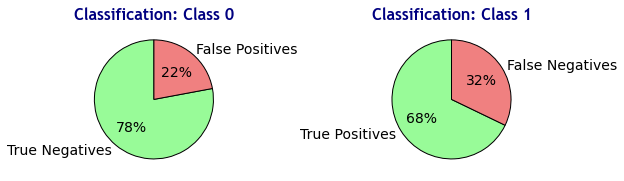

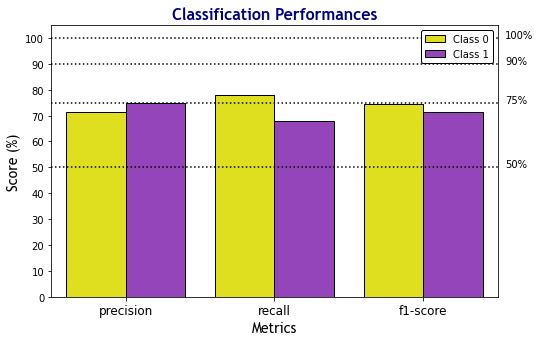

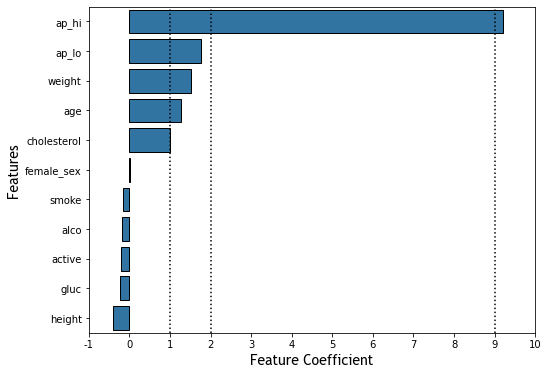

In [10]:
display(HTML(f"""
<div class = 'all'>
    <h1>Logistic Regression</h1>
    <p class = 'intro'>
        Logistic Regression is a widely used machine learning model for binary classification tasks. It models 
        the probability that a given input data point belongs to a particular class (in the present case, whether a patient 
        has cardiovascular disease or not). The output of Logistic Regression is a probability score between 0 and 1, 
        which is then thresholded to make a binary prediction.
    </p>
    <h4>Key Points</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Linear Decision Boundary:</strong> Logistic Regression creates a linear decision boundary to separate the two classes. This decision boundary is a hyperplane in the feature space.
        <br><strong>Probability Output:</strong> Instead of direct class prediction, Logistic Regression outputs probabilities. These probabilities represent the likelihood of the input belonging to the positive class.
        <br><strong>Log-Odds Transformation:</strong> Logistic Regression uses the log-odds (logit) transformation to model the relationship between the input features and the log-odds of the event occurring.
        <br><strong>Sigmoid Activation:</strong> The logistic function (sigmoid) is applied to the linear combination of input features. This function maps any real-valued number to the range [0, 1].
        <br><strong>Maximum Likelihood Estimation:</strong> Logistic Regression estimates parameters using maximum likelihood, aiming to maximize the likelihood of the observed class labels given the input features.
        <br><strong>Regularization:</strong> To prevent overfitting, regularization terms like L1 or L2 regularization can be added to the logistic regression cost function.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Inverse of Regularisation Strength</b><br><code>C</code></td>
            <td>{lr_params['C']}</td>
            <td style = 'text-align: justify !important'>The regularisation parameter <code>C</code> is the inverse of the regularisation strength. It controls the trade-off between fitting the training data well and preventing overfitting.</td>
            <td style = 'text-align: justify !important'>Smaller values of <code>C</code> lead to stronger regularisation, encouraging the model to generalize better but possibly underfit. Larger values of C reduce regularisation, allowing the model to fit the training data more closely but risking overfitting.
                <br><br><i>Note: <code>C=0.1</code> indicates strong regularisation, while <code>C=10</code> implies weaker regularisation.</i></td>
        </tr>
        <tr>
            <td><b>Regularisation Type</b><br><code>penalty</code></td>
            <td>{lr_params['penalty']}</td>
            <td style = 'text-align: justify !important'>The penalty parameter determines the type of regularisation applied to the model. It can be either <code>"l1"</code> for L1 regularisation (lasso) or <code>"l2"</code> for L2 regularisation (ridge).</td>
            <td style = 'text-align: justify !important'>L1 regularisation tends to produce sparse coefficients (some coefficients become exactly zero), leading to feature selection. L2 regularisation penalises large coefficients, encouraging smaller but non-zero coefficients for all features.</td>
        </tr>
        <tr>
            <td><b>Maximum Number of Iterations</b><br><code>max_iter</code></td>
            <td>{lr_params['max_iter']}</td>
            <td style = 'text-align: justify !important'>The maximum number of iterations is the maximum number of iterations for the solver to converge (reach a solution).</td>
            <td style = 'text-align: justify !important'>If the solver doesn't converge within the specified number of iterations, it might indicate that the model hasn't found a solution. Increasing the number of iterations may help in such cases.</td>
        </tr>
        <tr>
            <td><b>Optimisation Algorithm</b><br><code>solver</code></td>
            <td>{lr_params['solver']}</td>
            <td style = 'text-align: justify !important'>The solver parameter specifies the optimisation algorithm to use in fitting the logistic regression model.</td>
            <td style = 'text-align: justify !important'>Different solvers have different properties and may perform better or worse depending on the dataset size and characteristics. For example, <code>liblinear</code> is suitable for small datasets, while <code>saga</code> is useful for large datasets with a large number of features.
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(y_test, lr_pred)}
</div>
"""))
classification_plot(y_test, lr_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(lr_report)
report_table(lr_report)

display(HTML(
f"""
<div class = 'all'>
    <h3>Feature Importance</h3>
</div>
"""
))
lr_fi = lr_fi.sort_values(by='coef', ascending=False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'coef',
    data = lr_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 2, linestyle = 'dotted', color = 'black')
ax.axvline(x = 9, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(-1,10)
ax.set_xticks(ticks = range(-1,11,1), labels = range(-1,11,1))
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)

plt.show()

<h4>Code for: Random Forest - Model</h4>

In [11]:
rf = RandomForestClassifier(random_state=41)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_params = rf.get_params()

rf_fi = pd.DataFrame({
    'importance': rf.feature_importances_,
    'var': X.columns.tolist()
})

rf_report = classification_report(y_test, rf_pred, output_dict = True)

<h4>Code for: Random Forest - Report</h4>

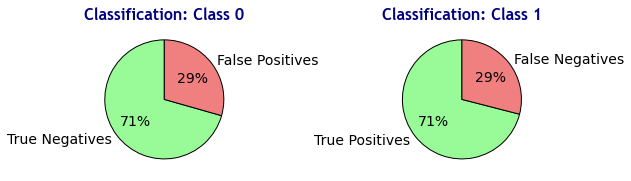

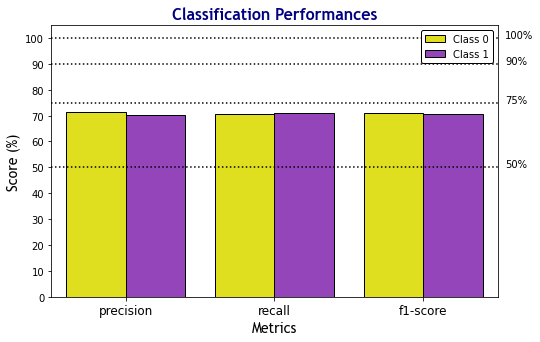

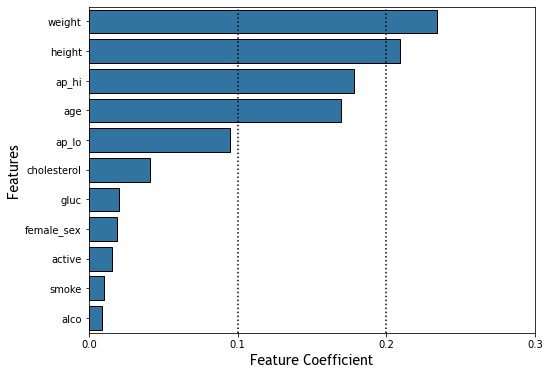

In [12]:
display(HTML(f"""
<div class = 'all'>
    <h1>Random Forest</h1>
    <p class = 'intro'>
        The Random Forest algorithm is an ensemble learning technique widely used for both classification and regression 
        tasks. It is an ensemble of decision trees, where multiple decision trees work together to make predictions.
        Random Forest builds multiple decision trees independently and combines their predictions through a voting or averaging mechanism.
    </p>
    <h4>Key Points</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Bootstrap Sampling:</strong> It starts by creating random subsets of the training data through bootstrap sampling (randomly selecting data points with replacement).
        <br><strong>Feature Randomization:</strong> At each node of each tree, only a random subset of features is considered for splitting. This introduces diversity among the trees.
        <br><strong>Aggregation:</strong> For classification tasks, Random Forest typically uses a majority voting mechanism to make predictions. For regression tasks, it averages the predictions of individual trees.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 20%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Number of Trees</b><br><code>n_estimators</code></td>
            <td>{rf_params['n_estimators']}</td>
            <td style='text-align: justify !important'>The number of decision trees that will be built during training.</td>
            <td style='text-align: justify !important'>Increasing the number of trees generally improves performance but comes at the cost of increased computation time. A common starting point is around 100 trees.</td>
        </tr>
        <tr>
            <td><b>Maximum Depth of Trees</b><br><code>max_depth</code></td>
            <td>{rf_params['max_depth']}</td>
            <td style='text-align: justify !important'>The maximum number of nodes or levels a decision tree has from the root node to the deepest leaf node.</td>
            <td style='text-align: justify !important'>Controlling the depth helps prevent overfitting. Smaller values of <code>max_depth</code> lead to simpler trees and better generalization.</td>
        </tr>
        <tr>
            <td><b>Minimum Samples to Split</b><br><code>min_samples_split</code></td>
            <td>{rf_params['min_samples_split']}</td>
            <td style='text-align: justify !important'>The minimum number of samples required to split an internal node during the construction of a decision tree.</td>
            <td style='text-align: justify !important'>Higher values of <code>min_samples_split</code> can result in more robust models by preventing the creation of small leaf nodes.</td>
        </tr>
        <tr>
            <td><b>Minimum Samples per Leaf</b><br><code>min_samples_leaf</code></td>
            <td>{rf_params['min_samples_leaf']}</td>
            <td style='text-align: justify !important'>The minimum number of samples required to be at a leaf node. This parameter influences the size of the leaves in the decision trees.</td>
            <td style='text-align: justify !important'>Controlling leaf size helps prevent overfitting. Larger values of <code>min_samples_leaf</code> result in simpler trees.</td>
        </tr>
        <tr>
            <td><b>Maximum Features</b><br><code>max_features</code></td>
            <td>{rf_params['max_features']}</td>
            <td style='text-align: justify !important'>The number of features to consider when looking for the best split in each decision tree.</td>
            <td style='text-align: justify !important'>This parameter controls the randomness of each tree. Using fewer features can lead to decorrelated trees, improving ensemble performance.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(y_test, rf_pred)}
</div>
"""))

classification_plot(y_test, rf_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(rf_report)
report_table(rf_report)

display(HTML(
f"""
<div class = 'all'>
    <h3>Feature Importance</h3>
</div>
"""
))
        
rf_fi = rf_fi.sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'importance',
    data = rf_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 0.1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.2, linestyle = 'dotted', color = 'black')
#ax.axvline(x = 0.3, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(0,0.3)
ax.set_xticks(ticks = [x/10 for x in range(0,4,1)], labels = [x/10 for x in range(0,4,1)])
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)

plt.show()

<h4>Code for: Support Vector Machines - Model</h4>

In [13]:
svm = SVC(random_state = 46)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_params = svm.get_params()
svm_report = classification_report(y_test, svm_pred, output_dict = True)

<h4>Code for: Support Vector Machines - Report</h4>

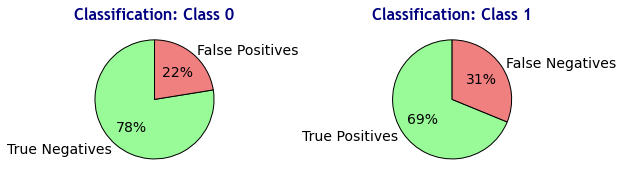

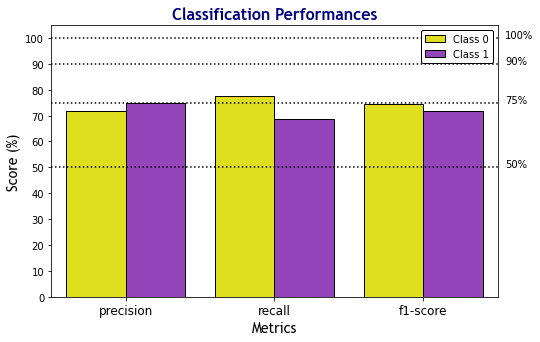

In [14]:
display(HTML(f"""
<div class = 'all'>
    <h1>Support Vector Machine</h1>
    <p class = 'intro'>
        The Support Vector Machine is a powerful supervised machine learning algorithm used for classification and 
        regression tasks. It is particularly effective in situations where data may not be linearly separable, 
        making it a versatile choice for various applications. SVM works by finding the hyperplane that maximizes 
        the margin between different classes of data points. It aims to create a decision boundary that effectively 
        separates data points into distinct categories while maximizing the margin between the classes.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 20%'>Parameter</th>
            <th style = 'width: 5%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Regularisation</b><br><code>C</code></td>
            <td>{svm_params['C']}</td>
            <td style='text-align: justify !important'>C controls the trade-off between achieving a low training error and a low testing error.</td>
            <td style='text-align: justify !important'>A small C encourages a larger-margin hyperplane, possibly allowing some training points to be misclassified. A large C penalizes misclassifications more heavily, leading to a smaller-margin hyperplane. Higher values of C may result in a more complex decision boundary, potentially leading to overfitting.</td>
        </tr>
        <tr>
            <td><b>Kernel</b><br><code>kernel</code></td>
            <td>{svm_params['kernel']}</td>
            <td style='text-align: justify !important'>Specifies the type of hyperplane used for separation. Common choices include linear, polynomial, radial basis function (RBF), and sigmoid kernels.</td>
            <td style='text-align: justify !important'>The choice of the kernel determines the shape of the decision boundary. Experimenting with different kernels is essential to find the one that works best for your data.</td>
        </tr>
        <tr>
            <td><b>Gamma</b><br><code>gamma</code></td>
            <td>{svm_params['gamma']}</td>
            <td style='text-align: justify !important'>Parameter for non-linear hyperplanes. It defines how far the influence of a single training example reaches. Low values mean a far reach, and high values mean a limited reach.</td>
            <td style='text-align: justify !important'>Smaller values of gamma lead to a more generalized solution, while larger values make the model more sensitive to the training data (potentially leading to overfitting).</td>
        </tr>
        <tr>
            <td><b>Decision Function Shape</b><br><code>decision_function_shape</code></td>
            <td>{svm_params['decision_function_shape']}</td>
            <td style='text-align: justify !important'>determines whether to use a one-vs-one (<code>'ovo'</code>) or one-vs-the-rest (<code>'ovr'</code>) strategy for multi-class classification.</td>
            <td style='text-align: justify !important'>The choice of strategy can affect the computational efficiency and performance, especially in the case of a large number of classes.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(y_test, svm_pred)}
</div>
"""))

classification_plot(y_test, svm_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_report)
report_table(svm_report)

<h4>Code for: K-Nearest Neighbors - Model</h4>

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_params = knn.get_params()
knn_report = classification_report(y_test, knn_pred, output_dict = True)

<h4>Code for: K-Nearest Neighbors - Report</h4>

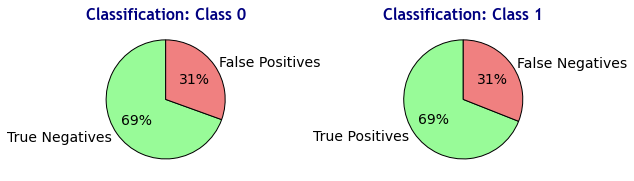

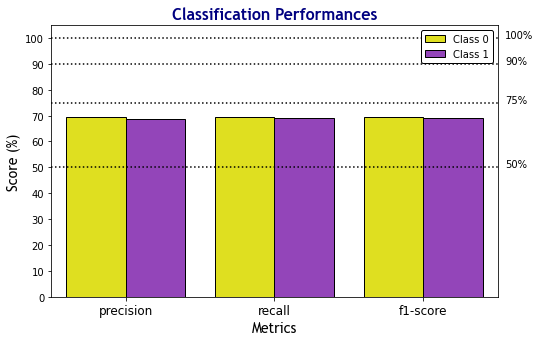

In [16]:
display(HTML(f"""
<div class = 'all'>
    <h1>K-Nearest Neighbors</h1>
    <p class = 'intro'>
        The k-Nearest Neighbors algorithm is a versatile supervised machine learning approach commonly used for 
        classification and regression tasks. It stands out for its simplicity and effectiveness, making it applicable 
        across various domains. KNN operates by identifying the k-nearest data points to a given test point and making 
        predictions based on the majority class (for classification) or average (for regression) of those neighbors. 
        It doesn't assume a specific underlying functional form and can adapt to different data distributions.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 10%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Neighbors</b><br><code>n_neighbors</code></td>
            <td>{knn_params['n_neighbors']}</td>
            <td style='text-align: justify !important'>The number of neighbors to consider when making predictions.</td>
            <td style='text-align: justify !important'>Smaller values make the model more sensitive to noise in the data, potentially leading to overfitting. Larger values provide a smoother decision boundary but may lead to underfitting.</td>
        </tr>
        <tr>
            <td><b>Weights</b><br><code>weights</code></td>
            <td>{knn_params['weights']}</td>
            <td style='text-align: justify !important'>weight given to each neighbor when making predictions. Options include 'uniform' (all neighbors have equal weight) and 'distance' (closer neighbors have more influence).</td>
            <td style='text-align: justify !important'>Choosing 'distance' may be useful when you expect nearer neighbors to have a greater impact on the prediction.</td>
        </tr>
        <tr>
            <td><b>Algorithm</b><br><code>algorithm</code></td>
            <td>{knn_params['algorithm']}</td>
            <td style='text-align: justify !important'>Specifies the algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'. The 'auto' option selects the most appropriate algorithm based on the values passed to fit.</td>
            <td style='text-align: justify !important'>Different algorithms may have different performance characteristics based on the dataset size and dimensionality.</td>
        </tr>
        <tr>
            <td><b>Power Parameter</b><br><code>p</code></td>
            <td>{knn_params['p']}</td>
            <td style='text-align: justify !important'>The power parameter for the Minkowski distance metric.</td>
            <td style='text-align: justify !important'>When <code>p</code> is set to 1, it is equivalent to using the Manhattan distance (L1 norm). When <code>p</code> is set to 2, it is equivalent to using the Euclidean distance (L2 norm). he choice of distance metric influences how distances are calculated and can affect the model's sensitivity to different features.</td>
        </tr>
        <tr>
            <td><b>Leaf Size</b><br><code>leaf_size</code></td>
            <td>{knn_params['leaf_size']}</td>
            <td style='text-align: justify !important'>The number of points at which the algorithm switches to brute-force search. It influences the trade-off between the time complexity of the search and the space complexity of the data structure.</td>
            <td style='text-align: justify !important'>Smaller values may lead to faster queries but require more memory. Larger values reduce memory requirements but may increase query time.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(y_test, knn_pred)}
</div>
"""))

classification_plot(y_test, knn_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(knn_report)
report_table(knn_report)

<h4>Code for: AdaBoost - Model</h4>

In [17]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)
adb_params = adb.get_params()
adb_report = classification_report(y_test, adb_pred, output_dict = True)

<h4>Code for: AdaBoost - Report</h4>

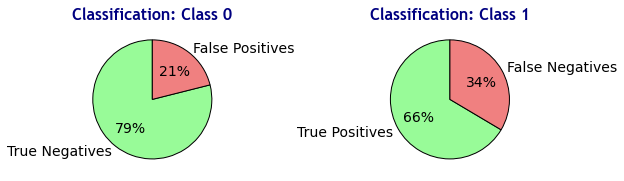

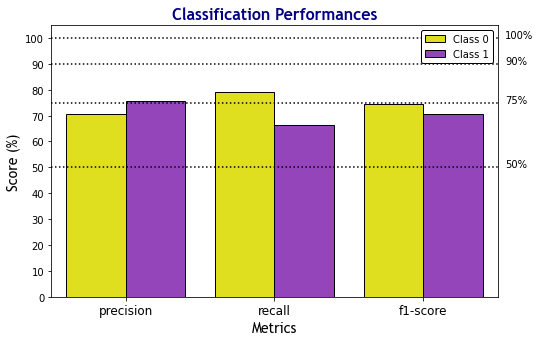

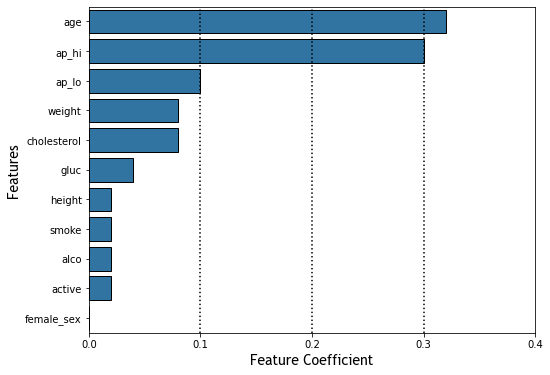

In [18]:
display(HTML(f"""
<div class = 'all'>
    <h1>AdaBoost</h1>
    <p class = 'intro'>
        AdaBoost, short for Adaptive Boosting, is a popular ensemble learning technique used for classification and 
        regression tasks. It is designed to improve the accuracy of weak learners (classifiers) by combining their 
        predictions into a strong ensemble model. AdaBoost works by sequentially training multiple weak classifiers on 
        the dataset. Each weak classifier focuses on the data points that were misclassified by the previous ones. 
        The algorithm assigns more weight to misclassified data points, allowing subsequent classifiers to pay more 
        attention to them. The final prediction is a weighted combination of the weak classifiers.
    </p>
    <h4>Key Points</h4>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; margin-left: 15px'>
        <strong>Sequential Learning:</strong> Weak learners are trained sequentially, and their performance guides subsequent iterations.
        <br><strong>Weighted Data:</strong> AdaBoost assigns different weights to data points, emphasizing the importance of misclassified samples.
        <br><strong>Weighted Voting:</strong> The final prediction is a weighted vote of all weak classifiers, with more accurate classifiers having a greater influence.
    </p>
    <h2>Default Model</h2>
    <h3>Parameters</h3>
    <table class = 'table_1' style = 'width: 100% !important'>
        <tr>
            <th style = 'width: 15%'>Parameter</th>
            <th style = 'width: 10%'>Value</th>
            <th>Definition</th>
            <th>Effect</th>
        </tr>
        <tr>
            <td><b>Weak Learners</b><br><code>n_estimators</code></td>
            <td>{adb_params['n_estimators']}</td>
            <td style='text-align: justify !important'>The number of weak learners (e.g., decision trees) to be combined in the ensemble. </td>
            <td style='text-align: justify !important'>Increasing the number of estimators may improve performance up to a certain point but could lead to overfitting if set too high. There's also a trade-off between computational cost and gains in accuracy.</td>
        </tr>
        <tr>
            <td><b>Learning Rate</b><br><code>learning_rate</code></td>
            <td>{adb_params['learning_rate']}</td>
            <td style='text-align: justify !important'>The contribution of each weak learner.</td>
            <td style='text-align: justify !important'>Smaller values may improve generalization but require a higher number of estimators.</td>
        </tr>
        <tr>
            <td><b>Base Estimator</b><br><code>base_estimator</code></td>
            <td>{adb_params['base_estimator']}</td>
            <td style='text-align: justify !important'>The weak learner used as the base model. If set to None, a decision tree with a depth of 1 <code>(DecisionTreeClassifier(max_depth=1))</code> is used by default.</td>
            <td style='text-align: justify !important'>The choice of the base estimator influences the flexibility of the ensemble. A shallow tree is often used to prevent overfitting.</td>
        </tr>
        <tr>
            <td><b>Algorithm</b><br><code>algorithm</code></td>
            <td>{adb_params['algorithm']}</td>
            <td style='text-align: justify !important'>The boosting algorithm to use. <code>'SAMME'</code> (Stagewise Additive Modeling using a Multiclass Exponential loss function) or <code>'SAMME.R'</code> (Real). <code>'SAMME.R'</code> is recommended for better performance.</td>
            <td style='text-align: justify !important'><code>'SAMME.R'</code> often converges faster and provides better accuracy compared to <code>'SAMME'</code>, especially when weak learners can assign class probabilities.</td>
        </tr>
    </table>
    <h3>Classification Results</h3>
    {matrix_display(y_test, adb_pred)}
</div>
"""))

classification_plot(y_test, adb_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(adb_report)
report_table(adb_report)

display(HTML(
f"""
<div class = 'all'>
    <h3>Feature Importance</h3>
</div>
"""
))

adb_fi = pd.DataFrame({'var': X.columns, 'importance' : adb.feature_importances_})

adb_fi = adb_fi.sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    y = 'var', 
    x = 'importance',
    data = adb_fi,
    edgecolor = 'black', 
    ax = ax
)

ax.axvline(x = 0.1, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.2, linestyle = 'dotted', color = 'black')
ax.axvline(x = 0.3, linestyle = 'dotted', color = 'black')

ax.set_ylabel('Features', fontdict = fontdict_labels)

ax.set_xlim(0,0.4)
ax.set_xticks(ticks = [x/10 for x in range(0,5,1)], labels = [x/10 for x in range(0,5,1)])
ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

ax.set_title(None)


plt.show()

<h4>Code for: Storing models performances in dfs</h4>

In [19]:
# scores_ml is a df that will store precision, recall, f1 and accuracy for both class 0 and class 1 of each tested model

scores_ml = pd.DataFrame()
reports = lr_report, rf_report, svm_report, knn_report, adb_report
names = ["lr_", "rf_", "svm_", "knn_", "adb_"]
classification = ['0.0', '1.0']

for report, name in zip(reports, names):    
    for i in ['0.0', '1.0']:
        report[i]['accuracy'] = report['accuracy']
        report[i]['class'] = i[0]
        name_index = name + i[0]
        scores_ml = pd.concat([scores_ml, pd.DataFrame(report[i], index = [name_index])])

scores_ml = scores_ml.reset_index().rename(columns = {'index' : 'model'}).drop(['support'], axis = 1)

# labels_ml is a df that stores % of True Negatives, False Positives, False Negatives and True Positives for each tested model

labels_ml = pd.DataFrame()
preds = [lr_pred, rf_pred, svm_pred, knn_pred, adb_pred]
full_names = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'AdaBoost']

for pred, name, report, full_name in zip(preds, names, reports, full_names):
    name_index = name[:-1]
    recap = pd.DataFrame({
            'TN': pd.crosstab(y_test, pred, normalize='index').iloc[0, 0],
            'FP': pd.crosstab(y_test, pred, normalize='index').iloc[0, 1],
            'FN': pd.crosstab(y_test, pred, normalize='index').iloc[1, 0],
            'TP': pd.crosstab(y_test, pred, normalize='index').iloc[1, 1],
            'accuracy': report['accuracy'],
            'full_name': full_name
        }, index=[name_index])
    labels_ml = pd.concat([labels_ml, recap])
    
labels_ml = labels_ml.reset_index().rename(columns = {'index' : 'model'})

Model,Class 0 - Absence of CV Disease,Class 1 - Presence of CV Disease,Accuracy
Logistic Regression,77.9%,67.8%,72.9%
Random Forest,70.6%,71.0%,70.8%
Support Vector Machines,77.6%,68.8%,73.2%
K-Nearest Neighbors,69.5%,69.0%,69.2%
AdaBoost,78.9%,66.5%,72.8%


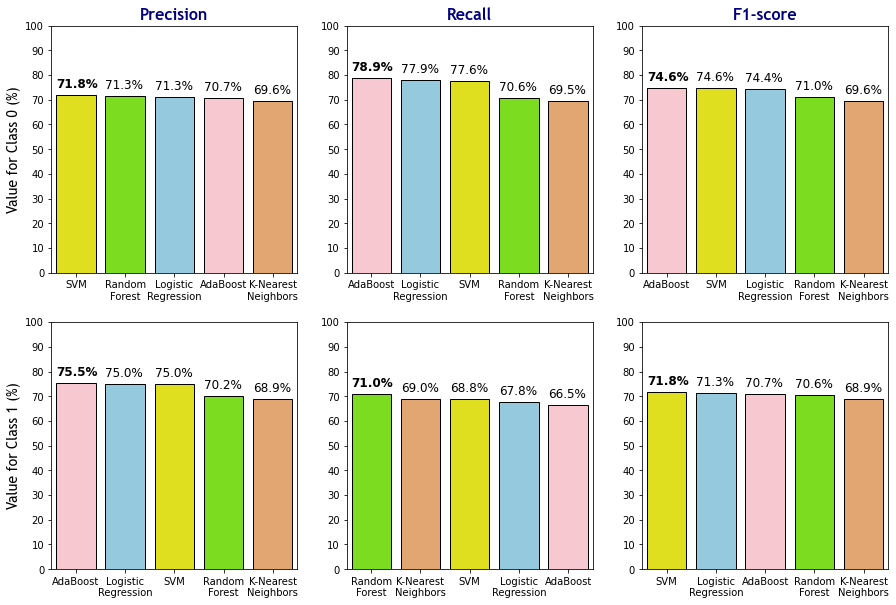

In [20]:
display(HTML(f"""
<div class = 'all'>
    <h1>Synthesis</h1>
    <p class = 'intro'>
        Now that all models have been trained and tested, with their performances recorded, we may select the model that 
        feels the most suitable for this classification project.
    </p>
    <h4>Reminder: Metrics Signification</h4>
    <p style='border-left: 3px solid silver; padding-left: 5px; font-size: 12.5px; margin-left: 15px'>
        <strong>Accuracy:</strong> Measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances. It provides a general assessment of model performance.
        <br><strong>Precision:</strong> Indicates the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. Precision is relevant when the cost of false positives is high.
        <br><strong>Recall:</strong> Measures the ability of the model to capture all the relevant instances, specifically the ratio of correctly predicted positive observations to the total actual positives. Recall is important when the cost of false negatives is high.
        <br><strong>F1 Score:</strong> Combines precision and recall into a single metric, providing a balance between the two. It is the harmonic mean of precision and recall, offering a comprehensive evaluation of the model's performance.
    </p>
    <h3>Correct Predictions</h3>
    

</div>
"""))
head = f"""
    <table class = 'table_1'>
        <tr>
            <th style = 'border-right: 1px solid black; width: 20%'>Model</th>
            <th style = 'border-right: 1px solid black'>Class 0 - <i>Absence of CV Disease</i></th>
            <th> Class 1 - <i>Presence of CV Disease</i></th>
            <th style = 'border-left: 1px solid black'>Accuracy</th>
        </tr>
"""
body = f""""""

for key, value in {'Logistic Regression' : 'lr', 'Random Forest' : 'rf', 'Support Vector Machines': 'svm', 'K-Nearest Neighbors': 'knn', 'AdaBoost': 'adb'}.items():
        body += f"""
            <tr>
                <td style = 'text-align: right !important'><b>{key}</b></td>"""
        
        for label in ['TN', 'TP', 'accuracy']:
            val = labels_ml[labels_ml['model'] == value][label].values[0]
            if val == np.max(labels_ml[label]):
                body += f"""<td style = 'color: forestgreen; font-weight: bold'>{val:.1%}</td>"""
            
            elif val == np.min(labels_ml[label]):
                    body += f"""<td style = 'color: firebrick; font-weight: bold'>{val:.1%}</td>"""
                    
            else:
                body += f"""<td>{val:.1%}</td>"""
        body += f"""</tr>"""
             
tail = f"""
    </table>
"""

display(HTML(f"""
<div class = 'all'>
    {head+body+tail}
    <h3>Performances</h3>
</div>
"""))

# Score df for class 0
scores_0 = scores_ml[scores_ml['class'] == "0"].drop('class', axis = 1)
scores_0['model'] = scores_0['model'].apply(lambda x: x[:-2])

# Score df for class 1
scores_1 = scores_ml[scores_ml['class'] == "1"].drop('class', axis = 1)
scores_1['model'] = scores_1['model'].apply(lambda x: x[:-2])

# scores_0_melt = pd.melt(scores_ml[scores_ml['class'] == "0"].drop(['class', 'accuracy'], axis = 1), id_vars = ['model'], var_name = ['metric'], value_name = 'score')
# scores_0_melt["model"] = scores_0["model"].apply(lambda row: row[:-2])


fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 2, ncols = 3)

x_ticks_models = {
    'lr': 'Logistic\nRegression',
    'rf' : 'Random\nForest',
    'svm': 'SVM',
    'knn': 'K-Nearest\nNeighbors',
    'adb': 'AdaBoost'
}

palette_models = {
    'lr': 'skyblue',
    'rf' : 'lawngreen',
    'svm': 'yellow',
    'knn': 'sandybrown',
    'adb': 'pink'
}


i = 0
for df in [scores_0, scores_1]:
    for param, param_spec in {"precision": spec[i,0], "recall": spec[i,1], "f1-score": spec[i,2]}.items():
        ax = fig.add_subplot(param_spec)

        sns.barplot(
            y = param, 
            x = "model", 
            data = df.sort_values(by = param, ascending = False), 
            edgecolor = 'black', 
            ax = ax, 
            palette= palette_models
        )

        ax.set_ylim(0,1)
        ax.set_yticks(ticks = [x/10 for x in range(0,11,1)], labels = range(0,110,10))
        if param_spec == spec[0,0]:
            ax.set_ylabel('Value for Class 0 (%)', fontdict = fontdict_labels)
        elif param_spec == spec[1,0]:
            ax.set_ylabel('Value for Class 1 (%)', fontdict = fontdict_labels)
        else:
            ax.set_ylabel(None)

        ax.set_xticklabels(x_ticks_models[label.get_text()] for label in ax.get_xticklabels())
        ax.set_xlabel(None)
        
        if df.equals(scores_0):
            ax.set_title(param.capitalize(), fontdict = fontdict_title)
        else:
            ax.set_title(None)
        
        # Setting the % value on top of each bar, the first bar in bold.
        first_bar = 0    
        for container in ax.containers:
            for bar in container.patches:
                x_bar = bar.get_x()
                y_bar = bar.get_height()
                if first_bar == 0:
                    ax.text(x_bar, y_bar+0.03, f"{y_bar:.1%}", size = 12, fontweight = 'bold')
                else:
                    ax.text(x_bar, y_bar+0.03, f"{y_bar:.1%}", size = 12)
                first_bar += 1
                             
    i += 1



plt.show()

display(HTML(f"""
<div class = 'all'>
    <h3>Performances Analysis</h3>
    <p>
        For this project, we tested five of the commonly machine learning models used for classification
        tasks, namely <b>Logistic Regression</b>, <b>Random Forest</b>, <b>Support Vector Machines</b>, 
        <b>K-Nearest Neighbors</b> and <b>AdaBoost</b>.
        These models were trained on the same dataset ({X_train.shape[0]} rows and {X_train.shape[1]} columns) and their
        performances were recorded. 
        Overall, all models presented comparable performances, with accuracies ranging from 
        <b>{np.min(labels_ml['accuracy']):.1%}</b> for 
        <b>{labels_ml.loc[labels_ml['accuracy'].idxmin(), 'full_name']}</b>
        to <b>{np.max(labels_ml['accuracy']):.1%}</b> for 
        <b>{labels_ml.loc[labels_ml['accuracy'].idxmax(), 'full_name']}</b>
    </p>
    <p>
        Regarding <b>Class 0</b>, <i>ie</i> absence of cardiovascular disease, 
        <b>{labels_ml.loc[labels_ml['TN'].idxmax(), "full_name"]}</b> was the best model, with 
        <b>{np.max(labels_ml['TN']):.1%}</b> of correct classifications. <b>Logistic Regression</b> and <b>SVM</b>
        also performed well, with {labels_ml[labels_ml['model'] == 'lr']['TN'].values[0]:.1%} and 
        {labels_ml[labels_ml['model'] == 'svm']['TN'].values[0]:.1%} of correct classifications, respectively. Conversely,
        <b>Random Forest</b> and <b>KNN</b> achieved only <b>{labels_ml[labels_ml['model'] == 'rf']['TN'].values[0]:.1%}</b>
        and <b>{labels_ml[labels_ml['model'] == 'knn']['TN'].values[0]:.1%}</b> of correct classification, respectively.
    </p>
    <p>
        <b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'full_name']}</b> however reached the highest rate
        (<b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'TP']:.1%}</b>) of correct classifications for <b>Class 1</b>
        (<i>ie</i> presence of Cardiovascular disease). 
        <b>KNN</b> ({labels_ml.loc[labels_ml['model'] == 'knn', 'TP'].values[0]:.1%}),
        <b>SVM</b> ({labels_ml.loc[labels_ml['model'] == 'svm', 'TP'].values[0]:.1%}) and
        <b>Logistic Regression</b> ({labels_ml.loc[labels_ml['model'] == 'lr', 'TP'].values[0]:.1%}) had comparable results,
        while <b>AdaBoost</b> provided only <b>{labels_ml.loc[labels_ml['TP'].idxmin(), 'TP']:.1%}</b> of correct classifications.
    </p>
    <h3>Feature Importance Review</h3>
    <p>
        Three models - <b>Logistic Regression</b>, <b>Random Forest</b> and <b>AdaBoost</b> provided insights on feature
        importance. Overall, <b>blood pressure</b>-related features, <b>age</b>, <b>weight</b>, and to a lesser extent
        <b>cholesterol</b> were the most important features of these models.
    </p>
    <p>
        In <b>Logistic Regression</b>, <code>ap_hi</code> was by far the most important feature, with a coefficient of
        <b>{lr_fi[lr_fi['var'] == "ap_hi"]['coef'].values[0]:.1f}</b>. Other features of importance were <code>ap_lo</code>,
        <code>weight</code>, <code>age</code> and <code>cholesterol</code>, with coefficients ranging from
        {np.min(lr_fi[lr_fi['var'].isin(['ap_lo', 'weight', 'age', 'cholesterol'])]['coef']):.1f} to
        {np.max(lr_fi[lr_fi['var'].isin(['ap_lo', 'weight', 'age', 'cholesterol'])]['coef']):.1f}.
    </p>
    <p>
        Regarding <b>Random Forest</b>, the most important features were <code>weight</code> and <code>height</code>, with
        coefficient higher than <b>0.2</b>. Other features of importance were <code>ap_hi</code>
        ({rf_fi[rf_fi['var'] == 'ap_hi']['importance'].values[0]:.3f}) and <code>age</code> 
        ({rf_fi[rf_fi['var'] == 'age']['importance'].values[0]:.3f}). Random forest was the only model that gave importance
        to <code>height</code>, its relevance in presence of a BMI feature should be assessed.
    </p>
    <p>
        Finally with <b>AdaBoost</b>, two features stood out: <code>age</code>
        (<b>{adb_fi[adb_fi['var'] == 'age']['importance'].values[0]:.3f}</b>) and <code>ap_hi</code> 
        (<b>{adb_fi[adb_fi['var'] == 'ap_hi']['importance'].values[0]:.3f}</b>), while <code>ap_lo</code>, <code>weight</code> and
        <code>cholesterol</code> were close to 0.1.
    </p>
</div>
<div class = 'all conclusion'>
    <h3>Conclusion</h3>
    <p>
        All things considered, <b>Support Vector Machines</b> will be selected for this project, as it presents the best accuracy
        (<b>{labels_ml.loc[labels_ml['accuracy'].idxmax(), 'accuracy']:.1%}</b>), a good rate of correct predictions
        for Class 0 (<b>{labels_ml[labels_ml['model'] == 'svm']['TN'].values[0]:.1%}</b>) and an acceptable rate for Class 1
        (<b>{labels_ml[labels_ml['model'] == 'svm']['TP'].values[0]:.1%}</b>).
    </p>
    <p>
        It should be kept in mind that Random Forest would have make a relevant choice as well, with the highest rate
        of correct classification for class 1 (<b>{labels_ml.loc[labels_ml['TP'].idxmax(), 'TP']:.1%}</b>) despite a lower
        accuracy (<b>{labels_ml[labels_ml['model'] == 'rf']['accuracy'].values[0]:.1%}</b>). In the present context, 
        we want to limit the number of wrong predictions for class 1. Indeed, should an individual be incorrectly labeled as "patient", further diagnostic
        testing would soon reveal that this individual do not have CV disease. On the other hand, misclassifiying a patient as
        not having CV disease may take them out of medical care for a while and have consequences.
    </p>
</div>
"""))